# Problem Statement

Impact of Medication for Lifestyle Diseases on Hospital Readmission

Management of lifestyle diseases in hospitalized patients has a significant bearing on
outcome, in terms of both morbidity and mortality. The main object for this problem is to
predict whether a patient is likely to be readmitted to hospital based on the previous details of
the patient.

In this project I will build a model predicting readmission for patients in Python using the following steps
- data exploration
- feature engineering
- building training/validation/test samples
- model selection
- model evaluation

# Project Definition

Predict if a patient will be readmitted to the hospital or not

# data Preprocessing

Target attribute: "readmitted" (discrete variable: 2 classes)
The dataset contains 48 features and 66587 rows in train dataset and 16647 data in test
dataset. The Column readmission is the target dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# load the csv file
df = pd.read_csv('/content/Train-1617360447408-1660719685476 (1).csv')

#Exploratory Data analysis

In [103]:
print('Number of samples:',len(df))

Number of samples: 66587


In [104]:
df.shape

(66587, 49)

Quick overview of the data (columns, variable type and non-null values)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

From briefly, looking through the data columns, we can see there are some identification columns, some numerical columns, some categorical (free-text) columns. These columns will be described in more detail below. 

In [106]:
df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


There is some missing data that are represented with ?. We will deal with this in the feature engineering section. 

The most important column here is `readmitted`, which tells us if a patient was hospitalized or not 

In [107]:
# count the number of rows for each type
df.groupby('readmitted').size()

readmitted
0    35823
1    30764
dtype: int64

Let's define a function to calculate the prevalence of population that is readmitted with 30 days. 

In [108]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [109]:
print('Prevalence:%.3f'%calc_prevalence(df['readmitted'].values))

Prevalence:0.462


Now we would like to get a feeling of the data for each column in our dataset. Pandas doesn't allow you to see all the columns at once, so let's look at them in groups of 10. 

In [110]:
print('Number of columns:',len(df.columns))

Number of columns: 49


In [111]:
df[list(df.columns)[:10]].head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17


In [112]:
df[list(df.columns)[10:20]].head()

,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5
0,1,9,1,1,4,783,403,585,585,32.970966
1,1,12,0,0,0,564,788,569,569,94.116731
2,2,24,0,0,5,574,403,585,585,64.138297
3,0,14,0,0,0,401,783,250,250,13.832428
4,1,11,0,0,0,311,276,300,300,82.898368


In [113]:
df[list(df.columns)[20:30]].head()

,number_diagnoses,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,9,None,None,No,No,No,No,No,No,No
1,6,None,None,No,No,No,No,No,No,No
2,9,None,None,No,No,No,No,No,No,No
3,7,None,Norm,No,No,No,No,No,No,No
4,9,>200,None,No,No,No,No,No,No,No


In [114]:
df[list(df.columns)[30:40]].head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,No,No,No,Steady,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No


In [115]:
df[list(df.columns)[40:]].head()

,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,No,No,No,No,No,No,No,Yes,1
1,No,No,No,No,No,No,No,No,0
2,Down,No,No,No,No,No,Ch,Yes,1
3,Down,No,No,No,No,No,Ch,Yes,1
4,No,No,No,No,No,No,No,No,1


From this, we see that there are a lot of categorical (non-numeric) variables. Note that the variables with _id are also categorical. Let's take a look at the unique values for each column. 

In [116]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

index: 48911 unique values
encounter_id: 48911 unique values
patient_id: 39650 unique values
race
['Hispanic' 'Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian']
gender
['Male' 'Female' 'Unknown/Invalid']
age
['[80-90)' '[60-70)' '[50-60)' '[70-80)' '[40-50)' '[20-30)' '[30-40)'
 '[90-100)' '[0-10)' '[10-20)']
weight
['?' '[0-25)' '[75-100)' '[50-75)' '[25-50)' '[125-150)' '[150-175)'
 '[100-125)' '>200' '[175-200)']
time_in_hospital
[ 4  3  6  5  9 13  2  7  1 11 12 10 14  8]
medical_specialty: 65 unique values
num_lab_procedures: 113 unique values
num_procedures
[1 2 0 3 4 5 6]
num_medications: 71 unique values
number_outpatient: 33 unique values
number_emergency
[ 1  0  3  2  6  8  5  4 12  7 20 19  9 16 10 18 63 13 11 22 15 28 25 21
 24 46]
number_inpatient
[ 4  0  5  1  3  2  6  9  7 10  8 11 15 14 12 13 19 16 18]
diag_1: 652 unique values
diag_2: 656 unique values
diag_3: 707 unique values
diag_4: 707 unique values
diag_5: 48911 unique values
number_diagnoses
[ 9  6  7  5  4  2  8

From analysis of the columns, I can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out, 

    - encounter_id and patient_id: these are just identifiers and not useful variables
    - age and weight: are categorical in this data set
    - X8,X18,X19,X25, only have 1 value, so I will not use these variables
    - diag_1, diag_2, diag_3,diag_4,diag_5 - are categorical and have a lot of values. I will not use these as part of this project, I will use number_diagnoses to capture some of this information. 
    - medical_speciality - has many categorical variables, so we should consider this when making features. 

# Feature Engineering

now i will create features for our predictive model. For each section, i will add new variables to the dataframe and then keep track of which columns of the dataframe i want to use as part of the predictive model features. i will break down this section into numerical features, categorical features and extra features. 

In this data set, the missing numbers were filled with a question mark. Let's replace it with a nan representation. 

In [117]:
# replace ? with nan
df = df.replace('?',np.nan)

## Numerical Features

The easiest type of features to use is numerical features. These features do not need any modification. The columns that are numerical that we will use are shown below

In [118]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [119]:
df.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [120]:
cols_num = ['time_in_hospital','num_lab_procedures','num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses']

Let's check if there are any missing values in the numerical data. 

In [121]:
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

## Categorical Features

The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below. 

The first set of categorical data we will deal with are these columns:

In [122]:
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [123]:
df.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [124]:
cols_cat = ['race', 'gender','X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed']

Let's check if there are any missing data

In [125]:
df[cols_cat].isnull().sum()

race           1504
gender            0
X1                0
X2                0
X3                0
X4                0
X5                0
X6                0
X7                0
X8                0
X9                0
X10               0
X11               0
X12               0
X13               0
X14               0
X15               0
X16               0
X17               0
X18               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X25               0
change            0
diabetesMed       0
dtype: int64

`race`,`weight`and `medical_specialty` have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the `fillna` function. 

In [126]:
df['race'] = df['race'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

Let's investigate medical specialty before we begin. 

In [127]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 65


medical_specialty
UNK                               32672
InternalMedicine                   9460
Emergency/Trauma                   4986
Family/GeneralPractice             4924
Cardiology                         3434
                                  ...  
Speech                                2
Proctology                            1
Pediatrics-Hematology-Oncology        1
DCPTEAM                               1
Psychiatry-Addictive                  1
Length: 65, dtype: int64

I can see that most of them are unknown and that the count drops off pretty quickly. I don't want to add 65 new variables since some of them only have a few samples. As an alternative, i can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods. 

In [128]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [129]:
df.groupby('med_spec').size()

med_spec
Cardiology                     3434
Emergency/Trauma               4986
Family/GeneralPractice         4924
InternalMedicine               9460
Nephrology                     1098
Orthopedics                     912
Orthopedics-Reconstructive      812
Other                          5455
Radiologist                     767
Surgery-General                2067
UNK                           32672
dtype: int64

To convert  categorical features to numbers, I will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column race, i would create new columns ('race_Caucasian','race_AfricanAmerican', etc). If the patient's race is Caucasian, the patient gets a 1 under 'race_Caucasian' and 0 under the rest of the race columns. To create these one-hot encoding columns, we can use the `get_dummies` function. 

Now the problem is that if i create a column for each unique value, i have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not AfricanAmerican, Asian, Causasian, Hispance or Other, it must be UNK. To deal with this, i can use the `drop_first` option, which will drop the first categorical value for each column. 

Now we are ready to make all of our categorical features

In [130]:
df_cat = pd.get_dummies(df[cols_cat + ['med_spec']],drop_first = True)

In [131]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,X1_>300,X1_None,X1_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


To add the one-hot encoding columns to the dataframe we can use `concat` function. Make sure to use axis = 1 to indicate add the columns. 

In [132]:
df = pd.concat([df,df_cat], axis = 1)

Save the column names of the categorical data. 

In [133]:
cols_all_cat = list(df_cat.columns)

## Extra features

The last two columns we want to make features are `age` and `weight`. Typically, you would think of these as numerical data, but they are categorical in this dataset as shown below.  

In [134]:
df[['age', 'weight']].head()

,age,weight
0,[80-90),NaN
1,[60-70),NaN
2,[50-60),NaN
3,[70-80),NaN
4,[70-80),NaN


One option could be to create categorical data as shown above. Since there is a natural order to these values, it might make more sense to convert these to numerical data. Another example when you would want to do this might be size of a t-shirt (small, medium, large). Let's start with age. 

In [135]:
df.groupby('age').size()

age
[0-10)        100
[10-20)       428
[20-30)      1154
[30-40)      2414
[40-50)      6324
[50-60)     11378
[60-70)     14845
[70-80)     17031
[80-90)     11080
[90-100)     1833
dtype: int64

Let's map these to 0-9 for the numerical data. 

In [136]:
age_id = {'[0-10)':1, 
          '[10-20)':2, 
          '[20-30)':3, 
          '[30-40)':4, 
          '[40-50)':5, 
          '[50-60)':6,
          '[60-70)':7, 
          '[70-80)':8, 
          '[80-90)':9, 
          '[90-100)':10}
df['age_group'] = df.age.replace(age_id)

Now let's look at weight. Recall that this feature is not filled out very often.  

In [137]:
df.weight.notnull().sum()

2133

Instead of creating an ordinal feature that we did above, let's just create a variable to say if weight was filled out or not. The presence of a variable might be predictive regardless of the value. 

In [138]:
df['has_weight'] = df.weight.notnull().astype('int')

Let's keep track of these extra columns too. 

In [139]:
cols_extra = ['age_group','has_weight']

## Engineering Features Summary

In [140]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 78
Numerical Features: 8
Categorical Features: 68
Extra features: 2


Let's check if we are missing any data. 

In [81]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital    0
X14_Steady          0
X14_Up              0
X15_No              0
X15_No              0
X15_Steady          0
X15_Steady          0
X16_Steady          0
X16_Steady          0
X17_Steady          0
dtype: int64

let's make a new dataframe that only has the columns of interest

In [141]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use+['readmitted']]

In [221]:
col2use

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gender_Unknown/Invalid',
 'X1_>300',
 'X1_None',
 'X1_Norm',
 'X2_>8',
 'X2_None',
 'X2_Norm',
 'X3_No',
 'X3_Steady',
 'X3_Up',
 'X4_No',
 'X4_Steady',
 'X4_Up',
 'X5_No',
 'X5_Steady',
 'X5_Up',
 'X6_Steady',
 'X6_Up',
 'X7_No',
 'X7_Steady',
 'X7_Up',
 'X9_No',
 'X9_Steady',
 'X9_Up',
 'X10_No',
 'X10_Steady',
 'X10_Up',
 'X11_Steady',
 'X12_No',
 'X12_Steady',
 'X12_Up',
 'X13_No',
 'X13_Steady',
 'X13_Up',
 'X14_No',
 'X14_Steady',
 'X14_Up',
 'X15_No',
 'X15_Steady',
 'X16_Steady',
 'X17_Steady',
 'X20_No',
 'X20_Steady',
 'X20_Up',
 'X21_No',
 'X21_Steady',
 'X21_Up',
 'X22_Steady',
 'X23_Steady',
 'X24_Steady',
 'change_No',
 'diabetesMed_Yes',
 'med_spec_Emergency/Trauma',
 'med_spec_Family/GeneralPractice',
 'med_s

In [222]:
df_data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,readmitted
0,2,15,0,9,1,0,1,9,0,1,...,0,0,0,0,0,0,0,6,0,1
1,12,74,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,0,8,0,0
2,4,6,0,12,1,2,0,9,0,1,...,0,0,0,0,0,0,1,5,0,1
3,1,55,1,15,10,0,0,7,0,1,...,1,0,0,0,0,0,0,7,0,0
4,6,43,1,18,0,0,0,8,0,1,...,0,0,0,0,0,0,0,8,0,0


In [223]:
df_data.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'race_UNK', 'gender_Male',
       'gender_Unknown/Invalid', 'X1_>300', 'X1_None', 'X1_Norm', 'X2_>8',
       'X2_None', 'X2_Norm', 'X3_No', 'X3_Steady', 'X3_Up', 'X4_No',
       'X4_Steady', 'X4_Up', 'X5_No', 'X5_Steady', 'X5_Up', 'X6_Steady',
       'X6_Up', 'X7_No', 'X7_Steady', 'X7_Up', 'X9_No', 'X9_Steady', 'X9_Up',
       'X10_No', 'X10_Steady', 'X10_Up', 'X11_Steady', 'X12_No', 'X12_Steady',
       'X12_Up', 'X13_No', 'X13_Steady', 'X13_Up', 'X14_No', 'X14_Steady',
       'X14_Up', 'X15_No', 'X15_Steady', 'X16_Steady', 'X17_Steady', 'X20_No',
       'X20_Steady', 'X20_Up', 'X21_No', 'X21_Steady', 'X21_Up', 'X22_Steady',
       'X23_Steady', 'X24_Steady', 'change_No', 'diabetesMed_Yes',
       'med_spec_Emergency/Trauma', 'med_spec_Fa

# Building Training/Validation/Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:
    - Training samples: these samples are used to train the model
    - Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model
    - Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model
  
In this project, we will split into 70% train, 15% validation, 15% test. 

The first thing I like to do is to shuffle the samples using `sample` in case there was some order (e.g. all positive samples on top). Here `n` is the number. `random_state` is just specified so the entire class gets the same shuffling. You wouldn't need `random_state` in your own projects. 

In [142]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

We can use `sample` again to extract 30% (using `frac`) of the data to be used for validation / test splits. It is important that validation and test come from similar distributions and this technique is one way to do it. 

In [143]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


And now split into test and validation using 50% fraction. 

In [144]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Note that `.drop` just drops the rows from `df_test` to get the rows that were not part of the sample. We can use this same idea to get the training data. 

In [145]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

At this point, let's check what percent of our groups are hospitalized within 30 days. This is known as prevalence. Ideally, all three groups would have similar prevalance. 

In [146]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.readmitted.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.readmitted.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.readmitted.values)))

Test prevalence(n = 9988):0.452
Valid prevalence(n = 9988):0.459
Train all prevalence(n = 46611):0.465


The prevalence is about the same for each group. 

Let's verify that we used all the data.

In [147]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 66587)


At this point, you might say, drop the training data into a predictive model and see the outcome. However, if we do this, it is possible that we will get back a model that is 89% accurate. Great! Good job! But wait, we never catch any of the readmissions (recall= 0%). How can this happen? 

What is happening is that we have an imbalanced dataset where there are much more negatives than positives, so the model might just assigns all samples as negative. 

Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:
    - sub-sample the more dominant class: use a random subset of the negatives
    - over-sample the imbalanced class: use the same positive samples multiple times
    - create synthetic positive data
    
Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement. 

In [149]:
# split the training data into positive and negative
rows_pos = df_train_all.readmitted == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.readmitted.values)))

Train balanced prevalence(n = 43346):0.500


Since we have done a lot of work, let's save our data.

In [150]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

Most machine learning packages like to use an input matrix X and output vector y, so let's create those:

In [152]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['readmitted'].values
y_valid = df_valid['readmitted'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (46611, 78)
Training shapes: (43346, 78) (43346,)
Validation shapes: (9988, 78) (9988,)


Some machine learning models have trouble when the variables are of different size (0-100, vs 0-1000000). To deal with that we can scale the data. Here we will use scikit learn's Standard Scaler  which removes the mean and scales to unit variance. Here I will create a scaler using all the training data, but you could use the balanced one if you wanted. 

In [153]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

We will need this scaler for the test data, so let's save it using a package called `pickle`. 

In [154]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [155]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

Now we can transform our data matrices 

In [156]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

# Model Selection

Wow! so much work to get ready for a model. This is always true in data science. You spend 80-90% cleaning and preparing data. 

In this section, we train a few machine learning models and use a few techniques for optimizing them. We will then select the best model based on performance on the validation set.

We will utilize the following functions to evaluate the performance of the model.

In [157]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [158]:
thresh = 0.5

## Model Selection: baseline models

In this section, we will compare the performance of 7 machine learning models using default hyperparameters. 

### K nearest neighbors (KNN)

In [159]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [160]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.656
accuracy:0.613
recall:0.553
precision:0.628
specificity:0.631
prevalence:0.500
 
Validation:
AUC:0.633
accuracy:0.597
recall:0.535
precision:0.564
specificity:0.610
prevalence:0.459
 


### Logistic regression

In [161]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [162]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.660
accuracy:0.614
recall:0.538
precision:0.634
specificity:0.690
prevalence:0.500
 
Validation:
AUC:0.661
accuracy:0.623
recall:0.536
precision:0.599
specificity:0.696
prevalence:0.459
 


### Stochastic Gradient Descent

When you have a lot of data logistic regression may take a long time to compute. There is an alternative approach called stochastic gradient descent that works similarly to logistic regression but doesn't use all the data at each iteration. 

In [163]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [164]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.657
accuracy:0.609
recall:0.547
precision:0.625
specificity:0.672
prevalence:0.500
 
Validation:
AUC:0.659
accuracy:0.613
recall:0.544
precision:0.584
specificity:0.671
prevalence:0.459
 


### Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB()

In [168]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.620
accuracy:0.529
recall:0.111
precision:0.678
specificity:0.947
prevalence:0.500
 
Validation:
AUC:0.622
accuracy:0.562
recall:0.114
precision:0.620
specificity:0.941
prevalence:0.459
 


### Decision Tree Classifier

In [169]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [170]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.717
accuracy:0.650
recall:0.598
precision:0.668
specificity:0.702
prevalence:0.500
 
Validation:
AUC:0.664
accuracy:0.621
recall:0.565
precision:0.591
specificity:0.669
prevalence:0.459
 


### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [172]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.676
accuracy:0.624
recall:0.567
precision:0.641
specificity:0.682
prevalence:0.500
 
Validation:
AUC:0.670
accuracy:0.628
recall:0.566
precision:0.600
specificity:0.681
prevalence:0.459
 


### Gradient Boosting Classifier

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [166]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.728
accuracy:0.660
recall:0.641
precision:0.666
specificity:0.679
prevalence:0.500
 
Validation:
AUC:0.681
accuracy:0.630
recall:0.607
precision:0.595
specificity:0.650
prevalence:0.459
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn. In this project, we will utilize the Area under the ROC curve (AUC) to evaluate the best model. This is a good data science performance metric for picking the best model since it captures the trade off between the true positive and false positive and does not require selecting a threshold. 

In [173]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_valid_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_valid_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_valid_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_valid_auc,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_valid_specificity,gbc_valid_specificity,]})

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

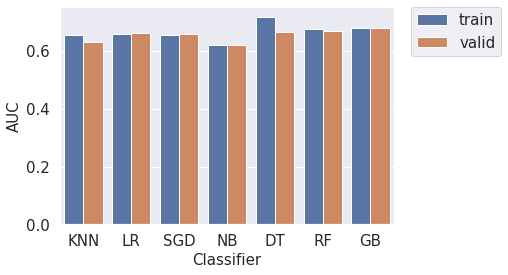

In [175]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

The next step is to try to improve the models. 

## Model Selection: Learning Curve

We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn's website with a small change of plotting the AUC instead of accuracy. http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html. 

In [176]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

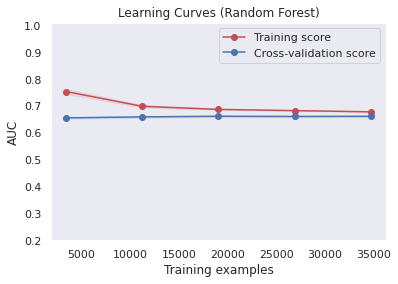

In [177]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

In the case of random forest, we can see the training and validation scores are similar but they both have low scores. This is called high bias and is a sign of underfitting. 

Depending on your learning curve, there are a few strategies you can employ to improve your models

High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture 


High Variance:
- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture


Source: Andrew Ng's [Coursera class](https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&campaignid=904733485&adgroupid=54215108588&device=c&keyword=andrew%20ng&matchtype=p&network=g&devicemodel=&adpostion=1t1&creativeid=231631799402&hide_mobile_promo&gclid=Cj0KCQjwk_TbBRDsARIsAALJSOZlkCoqhf68wjopusy6Kzw1qewNAEC-9H0K1LhwOwRZ2llTZtVINicaAiG-EALw_wcB) paraphrased on <https://www.learnopencv.com/bias-variance-tradeoff-in-machine-learning/> and Andrew Ng's Machine Learning Yearning textbook. 


## Model Selection: Feature Importance

One path for improving your models to understand what features are important to your models. This can usually only be investigated for simpler models such as Logistic Regression or Random Forests. This analysis can help in a few areas:
    
    - inspire new feature ideas --> helps with both high bias and high variance
    - obtain a list of the top features to be used for feature reduction --> helps with high variance
    - point out errors in your pipeline --> helps with robustness of model

Let's get the feature importance for a few models and then we can discuss what we see. 


### Feature Importance: Logistic regression

Logistic regression is a very interpretable model because the coefficient for each variable shows how important that variable is for the prediction. Note that you need to have normalized the data so the coefficients are comparable between variables. We can extract the coefficients using `coef_` and store in a new dataframe (sorted by importance) 

In [178]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [179]:
feature_importances.head()

,importance
number_inpatient,0.452931
X21_Steady,0.309178
X21_No,0.289667
number_emergency,0.183173
X13_Steady,0.182828


For logistic regression, the variables with highest positive coefficients are predictive of re-hospitalization and the variables with highest negative coefficients are predictive of not being re-hospitalized. We can plot the top 50 for each direction below. 

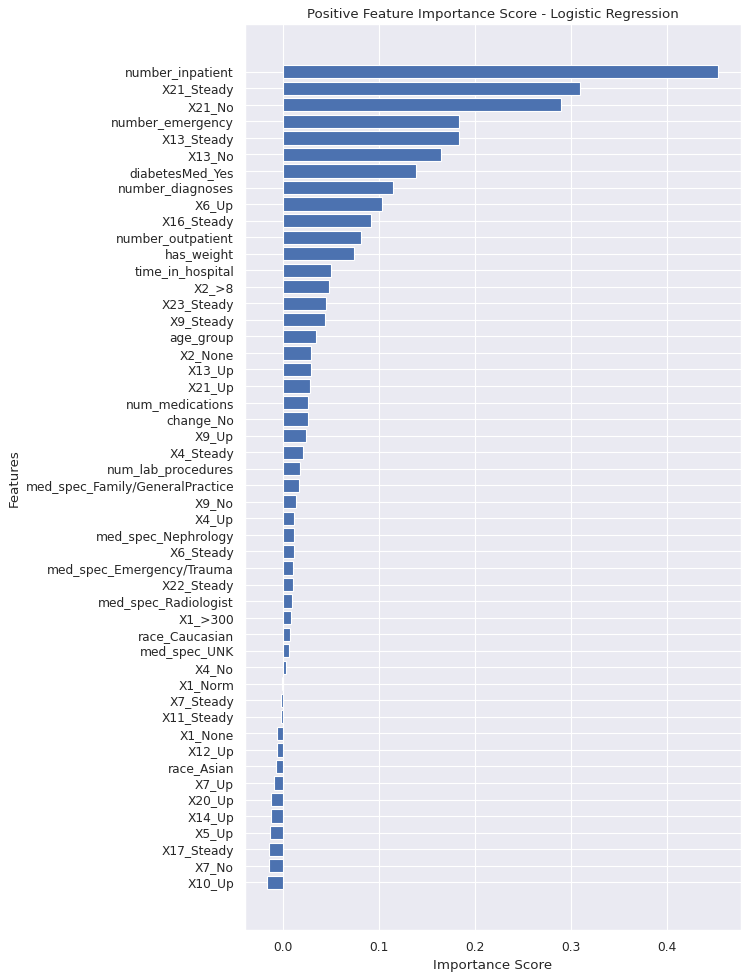

In [180]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

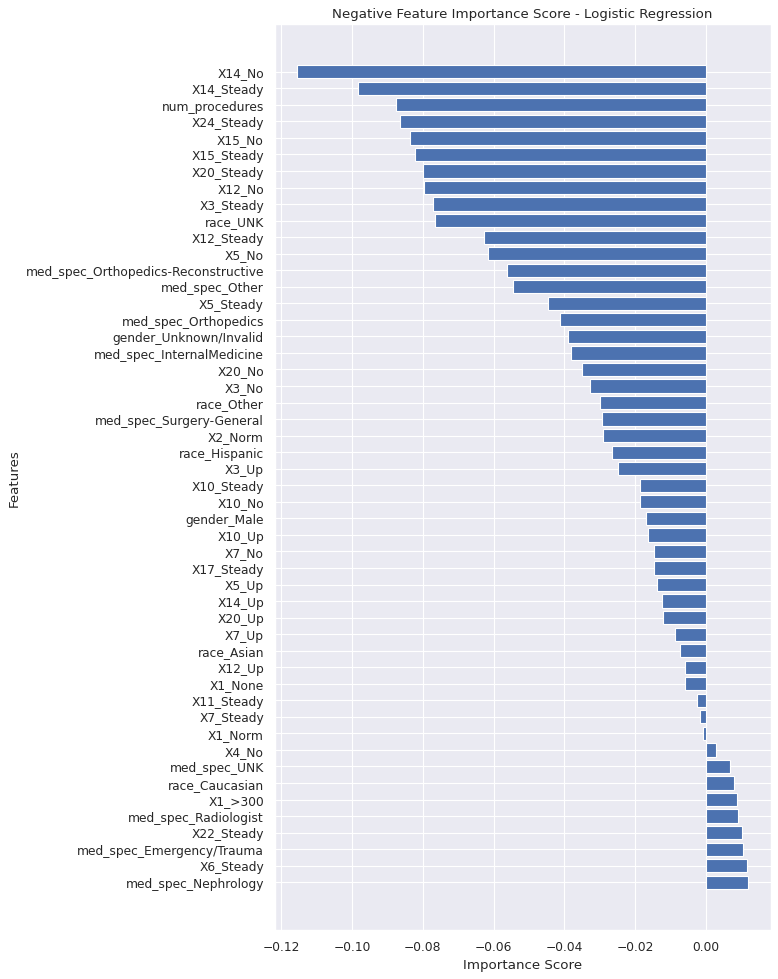

In [181]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

### Feature Importance: random forest

We can also investigate feature importance for random forest models. In this case, the feature importance shows how often a particular feature was used to split the data. In this case, we don't know if a particular feature is correlated with the positive class or negative class, but rather it is just importance for making a decision. 

In [182]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [183]:
feature_importances.head()

,importance
number_inpatient,0.324258
number_emergency,0.123564
number_diagnoses,0.098703
number_outpatient,0.080241
num_medications,0.052112


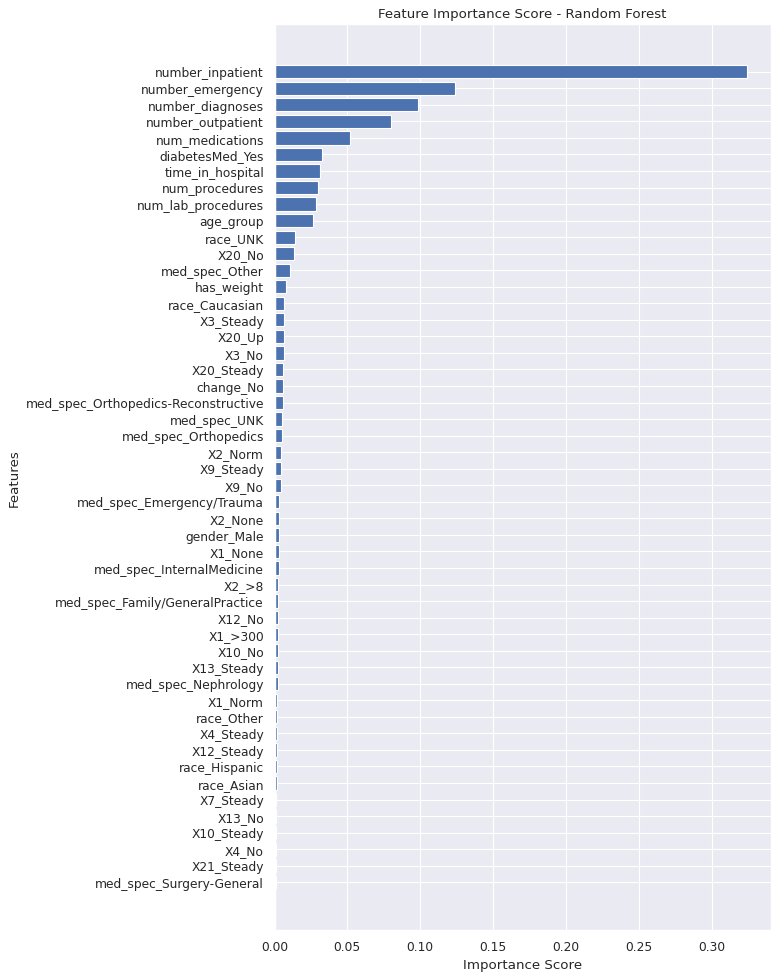

In [184]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

As you can see here, most of the important variables for random forest are continuous variables. This makes sense since you can split continuous variables more times than categorical variables. 

### Feature Importance: Summary

After reviewing these plots, you might be inspired to get some new data related to the most important features. For example, in both models the most important feature is `number_inpatient`, which is the number of inpatient visits in the last year. This means that if patients have been to the hospital in the last year they are more likely to be re-hospitalized again. This might inspire you to get (if you have it) more data about their prior admissions. For your company, you might be able to research rules for being discharged to a rehab facility and add features related to those rules. Since most of the data analysts / data scientists won't have the deep domain knowledge. I probably would take a few of these features to other experts (e.g. doctors) and ask them about the medications.  

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically. For example, only using the top feature will likely drop the performance by a lot. Another strategy that you could use to reduce the number of variables is called PCA (principle component analysis). This is also implemented in scikit-learn if you are interested. 

The last thing that I want to mention is that the feature importance plots may also point out errors in your predictive model. Perhaps, you have some data leakage in the cleaning process. Data leakage can be thought of as the process of accidentally including something in the training that allows the machine learning algorithm to artificially cheat. For example, I built a model based on the doctor's discharge notes. When I performed this same analysis on the most important words, I discovered that the top word for predicting someone would not be re-admitted was 'death'. This made me realize that I made a mistake and forgot to exclude patients who expired in the current hospital visit. Learning from my mistakes, I had you exclude the discharge codes related to death. Similar things can also happen when you merge datasets. Perhaps when you merged the datasets one of the classes ended up with nan for some of the variables. The analysis above will help you catch some of these cases.  

## Model Selection: Hyperparameter tuning

The next thing that we should investigate is hyperparameter tuning. Hyperparameter tuning are essentially the design decisions that you made when you set up the machine learning model. For example, what is the maximum depth for your random forest? Each of these hyperparameters can be optimized to improve the model. 

In this section, we will only optimize the hyper parameters for stochastic gradient descent, random forest and gradient boosting classifier. We will not optimize KNN since it took a while to train. We will not optimize Logistic regression since it performs similarly to stochastic gradient descent. We will not optimize decision trees since they tend to overfit and perform worse that random forests and gradient boosting classifiers.

one technique for hyperparameter tuning is called a Grid search where you test all possible combinations over a grid of values. This is very computationally intensive. The other option is to randomly test a permutation of them. This technique called Random Search is also implemented in scikit-learn. 

we can get a list of the parameters inside a model with `get_params`. Here are the parameters in the random forest model. Wow there are so many of them! 

In [185]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Let's create a grid over a few of these (see the scikit-learn website for the descriptions). 

In [186]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc. 

In [187]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [188]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

Three important parameters of `RandomizedSearchCV` are
- scoring = evaluation metric used to pick the best model
- n_iter = number of different combinations
- cv = number of cross-validation splits

increasing the last two of these will increase the run-time, but will decrease chance of overfitting.  Note that the number of variables and grid size also influences the runtime. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time. 

In [190]:
# fit the random search model (this will take a few minutes)
import time
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
258.1917893886566


See the best parameters

In [191]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

Let's analyze the performance of the best model compared to the baseline model.

In [192]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.676
Validation AUC:0.670
Optimized Random Forest
Training AUC:0.716
Validation AUC:0.686


Optimize stochastic gradient descent

In [193]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


22.796358346939087


In [194]:
sgdc_random.best_params_

{'penalty': 'l1', 'max_iter': 200, 'alpha': 0.001}

In [195]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.657
Validation AUC:0.659
Optimized sgdc
Training AUC:0.660
Validation AUC:0.663


Optimize gradient boosting classifier

In [196]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

429.42095398902893


In [197]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

In [199]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.728
Validation AUC:0.681
Optimized gbc
Training AUC:0.716
Validation AUC:0.689


### Hyperparameter tuning results

In [200]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [201]:
df_results

,classifier,data_set,auc
0,SGD,base,0.658770
1,SGD,optimized,0.662856
2,RF,base,0.669808
3,RF,optimized,0.686429
4,GB,base,0.680544
5,GB,optimized,0.689346


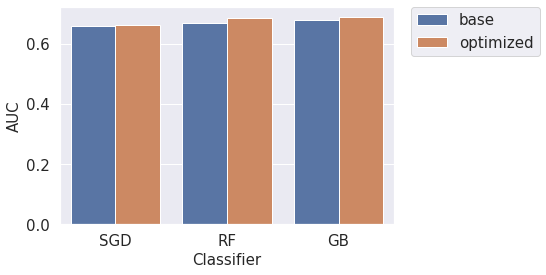

In [203]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

We can see that the hyperparameter tuning improved the models, but not by much.

## Model Selection: Best Classifier

 Here we will chose the gradient boosting classifier since it has the best AUC on the validation set. You won't want to train your best classifier every time you want to run new predictions. Therefore, we need to save the classifier. We will use the package pickle.

In [204]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Now that we have selected our best model. Let's evaluate the performance of the test set.

In [207]:
X_test = df_test[col2use].values
y_test = df_test['readmitted'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [208]:
best_model = pickle.load(open('best_classifier.pkl','rb'))


In [219]:
y_train_preds1 = best_model.predict(X_train_tf)[:,1]
y_valid_preds1 = best_model.predict(X_valid_tf)[:,1]
y_test_preds1 = best_model.predict(X_test_tf)[:,1]

IndexError: ignored

In [209]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]


In [213]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.716
accuracy:0.653
recall:0.614
precision:0.666
specificity:0.693
prevalence:0.500
 
Validation:
AUC:0.689
accuracy:0.642
recall:0.599
precision:0.612
specificity:0.678
prevalence:0.459
 
Test:
AUC:0.682
accuracy:0.629
recall:0.585
precision:0.590
specificity:0.666
prevalence:0.452
 


In [218]:
from sklearn.metrics import classification_report 
print(classification_report(y_train, y_train_preds))


ValueError: ignored

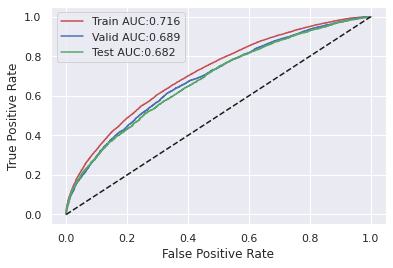

In [211]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Through this project, i created a binary classifier to predict the probability that a patient  would be readmitted to the hospital or not. On held out test data, our best model had an AUC of of 0.68